Ραυτόπουλος Μιχαήλ

In [1]:
# importing all the necessary libraries
import pandas as pd
import glob
import numpy as np
import csv
import scipy as sp
import nltk
import sklearn
import math
from operator import itemgetter
#nltk.download('stopwords')
#nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import  WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import itertools
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, auc
from sklearn.model_selection import KFold
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
from sklearn.metrics import adjusted_rand_score
from scipy.spatial.distance import cosine
from nltk.cluster.kmeans import KMeansClusterer
from numpy import array
from nltk import cluster
from nltk.cluster import euclidean_distance
from nltk.cluster import cosine_distance

In [2]:
# this cell contains the reading process for all the files of the business directory

pathB = r'C:\Users\dimitris\Desktop\Project2TED\fulltext\data\business' # use your path
all_filesB = glob.glob(pathB + "/*.txt") # specifying the files to read

column_names = ["id", "title", "content","category"] # creating the form of our tsv
df_bus = pd.DataFrame(columns = column_names) # we have 4 columns as demanded in the assignment 

count = 1000 # this variable will help regarding the id assignment process

for filename in all_filesB: # outside loop for all the files in current directory
    data = pd.read_csv(filename, sep="/t", header=None, engine='python') # read the text file and store it into a dataframe
    content = data.stack().to_frame().T
    contentList = content.values.tolist()
    df_bus.loc[count,"title"] = contentList[0][0] # appending the title to the appropriate column of current row
    df_bus.loc[count,"content"] = ''.join(contentList[0][1:]) # appending the content to the appropriate column    
    df_bus.loc[count,"id"] = count # appending the id to the appropriate column of current row
    df_bus.loc[count,"category"] = "business" # appending the category to the appropriate column of current row
    count = count + 1
    
#df_bus


In [3]:
# this cell contains the reading process for all the files of the entertainment directory

pathE = r'C:\Users\dimitris\Desktop\Project2TED\fulltext\data\entertainment' # use your path
all_filesE = glob.glob(pathE + "/*.txt") # specifying the files to read

df_ent = pd.DataFrame(columns = column_names) # we have 4 columns as demanded in the assignment 

count = 2000

for filename in all_filesE: # outside loop for all the files in current directory
    data = pd.read_csv(filename, sep="/n", header=None, engine='python') # read the text file and store it into a dataframe
    content = data.stack().to_frame().T
    contentList = content.values.tolist()
    df_ent.loc[count,"title"] = contentList[0][0] # appending the title to the appropriate column of current row
    df_ent.loc[count,"content"] = ''.join(contentList[0][1:]) # appending the content to the appropriate column    
    df_ent.loc[count,"id"] = count # appending the id to the appropriate column of current row
    df_ent.loc[count,"category"] = "entertainment" # appending the category to the appropriate column of current row
    count = count + 1
#df_ent

In [4]:
# this cell contains the reading process for all the files of the politics directory

pathP = r'C:\Users\dimitris\Desktop\Project2TED\fulltext\data\politics' # use your path
all_filesP = glob.glob(pathP + "/*.txt") # specifying the files to read

df_pol = pd.DataFrame(columns = column_names) # we have 4 columns as demanded in the assignment 

count = 3000

for filename in all_filesP: # outside loop for all the files in current directory
    data = pd.read_csv(filename, sep="/n", header=None, engine='python') # read the text file and store it into a dataframe
    content = data.stack().to_frame().T
    contentList = content.values.tolist()
    df_pol.loc[count,"title"] = contentList[0][0] # appending the title to the appropriate column of current row
    df_pol.loc[count,"content"] = ''.join(contentList[0][1:]) # appending the content to the appropriate column    
    df_pol.loc[count,"id"] = count # appending the id to the appropriate column of current row
    df_pol.loc[count,"category"] = "politics" # appending the category to the appropriate column of current row
    count = count + 1
#df_pol

In [5]:
# this cell contains the reading process for all the files of the sport directory

pathS = r'C:\Users\dimitris\Desktop\Project2TED\fulltext\data\sport' # use your path
all_filesS = glob.glob(pathS + "/*.txt") # specifying the files to read

df_sp = pd.DataFrame(columns = column_names) # we have 4 columns as demanded in the assignment 

count = 4000

for filename in all_filesS: # outside loop for all the files in current directory
    data = pd.read_csv(filename, sep="/n", header=None, engine='python') # read the text file and store it into a dataframe
    content = data.stack().to_frame().T
    contentList = content.values.tolist()
    df_sp.loc[count,"title"] = contentList[0][0] # appending the title to the appropriate column of current row
    df_sp.loc[count,"content"] = ''.join(contentList[0][1:]) # appending the content to the appropriate column    
    df_sp.loc[count,"id"] = count # appending the id to the appropriate column of current row
    df_sp.loc[count,"category"] = "sport" # appending the category to the appropriate column of current row
    count = count + 1
#df_sp

In [6]:
# this cell contains the reading process for all the files of the tech directory

pathT = r'C:\Users\dimitris\Desktop\Project2TED\fulltext\data\tech' # use your path
all_filesT = glob.glob(pathT + "/*.txt") # specifying the files to read

df_tech = pd.DataFrame(columns = column_names) # we have 4 columns as demanded in the assignment 

count = 5000

for filename in all_filesT: # outside loop for all the files in current directory
    data = pd.read_csv(filename, sep="/n", header=None, engine='python') # read the text file and store it into a dataframe
    content = data.stack().to_frame().T
    contentList = content.values.tolist()
    df_tech.loc[count,"title"] = contentList[0][0] # appending the title to the appropriate column of current row
    df_tech.loc[count,"content"] = ''.join(contentList[0][1:]) # appending the content to the appropriate column    
    df_tech.loc[count,"id"] = count # appending the id to the appropriate column of current row
    df_tech.loc[count,"category"] = "tech" # appending the category to the appropriate column of current row
    count = count + 1
#df_tech

In [7]:
# here we concatenate all of the dataframes created above and we create a dataframe that contains all the categories of files

df_final = pd.concat([df_bus, df_ent, df_pol,df_sp,df_tech]) 
df_final.to_csv('final.tsv',sep='\t', quoting=csv.QUOTE_NONE, index=False)

# here we check that the final dataframe that was written to our file is correct
# so we open the file, read it, store it into a dataframe and print it
tsv_file = open("final.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")
lol = pd.DataFrame(read_tsv)
#lol
# it all works correctly!!!

In [8]:
# removing links,lower,tokenization(with RegexpTokenizer who removes punktuation also),
# stopword removal,number removal,stemming(lemmatizing).
# in this cell we implement the process above in order to create a wordcloud for the business category
# based on the content of the articles

articlesB=[]
count=0
for t in df_bus["content"]:
    t= ' '.join(item for item in t.split() if not (item.startswith('http')))
    t= ' '.join(item for item in t.split() if not (item.startswith('@')))
    t= ' '.join(item for item in t.split() if not (item.startswith('#')))
    t=t.lower()
    tknzr = RegexpTokenizer(r'\w+')
    tokenized_article = tknzr.tokenize(t)
    filtered_article = [w for w in tokenized_article if not w in stopwords.words('english')]
    filtered_article = [w for w in filtered_article if w.isalpha() ]
    lemmatizer = WordNetLemmatizer()
    lemmatized_article=[lemmatizer.lemmatize(token) for token in filtered_article]
    articlesB.append(lemmatized_article)
    count=count+1;


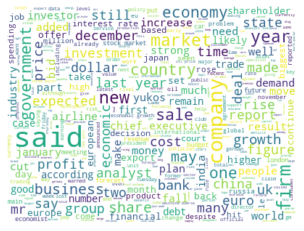

In [9]:
# in this cell we actually create the wordcloud for the BUSINESS category

text = ''.join([' '.join(x) for x in articlesB])
wordcloud = WordCloud(width=400,height=300,max_font_size=40, max_words=1000, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
# removing links,lower,tokenization(with RegexpTokenizer who removes punktuation also),
# stopword removal,number removal,stemming(lemmatizing).
# in this cell we implement the process above in order to create a wordcloud for the entertainment category
# based on the content of the articles

articlesE=[]
count=0
for t in df_ent["content"]:
    t= ' '.join(item for item in t.split() if not (item.startswith('http')))
    t= ' '.join(item for item in t.split() if not (item.startswith('@')))
    t= ' '.join(item for item in t.split() if not (item.startswith('#')))
    t=t.lower()
    tknzr = RegexpTokenizer(r'\w+')
    tokenized_article = tknzr.tokenize(t)
    filtered_article = [w for w in tokenized_article if not w in stopwords.words('english')]
    filtered_article = [w for w in filtered_article if w.isalpha() ]
    lemmatizer = WordNetLemmatizer()
    lemmatized_article=[lemmatizer.lemmatize(token) for token in filtered_article]
    articlesE.append(lemmatized_article)
    count=count+1;


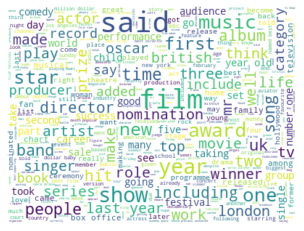

In [11]:
# in this cell we actually create the wordcloud for the ENTERTAINMENT category

text = ''.join([' '.join(x) for x in articlesE])
wordcloud = WordCloud(width=400,height=300,max_font_size=40, max_words=1000, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# removing links,lower,tokenization(with RegexpTokenizer who removes punktuation also),
# stopword removal,number removal,stemming(lemmatizing).
# in this cell we implement the process above in order to create a wordcloud for the sport category
# based on the content of the articles

articlesS=[]
count=0
for t in df_sp["content"]:
    t= ' '.join(item for item in t.split() if not (item.startswith('http')))
    t= ' '.join(item for item in t.split() if not (item.startswith('@')))
    t= ' '.join(item for item in t.split() if not (item.startswith('#')))
    t=t.lower()
    tknzr = RegexpTokenizer(r'\w+')
    tokenized_article = tknzr.tokenize(t)
    filtered_article = [w for w in tokenized_article if not w in stopwords.words('english')]
    filtered_article = [w for w in filtered_article if w.isalpha() ]
    lemmatizer = WordNetLemmatizer()
    lemmatized_article=[lemmatizer.lemmatize(token) for token in filtered_article]
    articlesS.append(lemmatized_article)
    count=count+1;

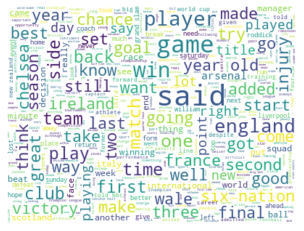

In [13]:
# in this cell we actually create the wordcloud for the SPORT category

text = ''.join([' '.join(x) for x in articlesS])
wordcloud = WordCloud(width=400,height=300,max_font_size=40, max_words=1000, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
# removing links,lower,tokenization(with RegexpTokenizer who removes punktuation also),
# stopword removal,number removal,stemming(lemmatizing).
# in this cell we implement the process above in order to create a wordcloud for the politics category
# based on the content of the articles

articlesP=[]
count=0
for t in df_pol["content"]:
    t= ' '.join(item for item in t.split() if not (item.startswith('http')))
    t= ' '.join(item for item in t.split() if not (item.startswith('@')))
    t= ' '.join(item for item in t.split() if not (item.startswith('#')))
    t=t.lower()
    tknzr = RegexpTokenizer(r'\w+')
    tokenized_article = tknzr.tokenize(t)
    filtered_article = [w for w in tokenized_article if not w in stopwords.words('english')]
    filtered_article = [w for w in filtered_article if w.isalpha() ]
    lemmatizer = WordNetLemmatizer()
    lemmatized_article=[lemmatizer.lemmatize(token) for token in filtered_article]
    articlesP.append(lemmatized_article)
    count=count+1;

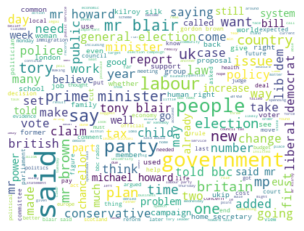

In [15]:
# in this cell we actually create the wordcloud for the POLITICS category

text = ''.join([' '.join(x) for x in articlesP])
wordcloud = WordCloud(width=400,height=300,max_font_size=40, max_words=1000, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
# removing links,lower,tokenization(with RegexpTokenizer who removes punktuation also),
# stopword removal,number removal,stemming(lemmatizing).
# in this cell we implement the process above in order to create a wordcloud for the tech category
# based on the content of the articles

articlesT=[]
count=0
for t in df_tech["content"]:
    t= ' '.join(item for item in t.split() if not (item.startswith('http')))
    t= ' '.join(item for item in t.split() if not (item.startswith('@')))
    t= ' '.join(item for item in t.split() if not (item.startswith('#')))
    t=t.lower()
    tknzr = RegexpTokenizer(r'\w+')
    tokenized_article = tknzr.tokenize(t)
    filtered_article = [w for w in tokenized_article if not w in stopwords.words('english')]
    filtered_article = [w for w in filtered_article if w.isalpha() ]
    lemmatizer = WordNetLemmatizer()
    lemmatized_article=[lemmatizer.lemmatize(token) for token in filtered_article]
    articlesT.append(lemmatized_article)
    count=count+1;

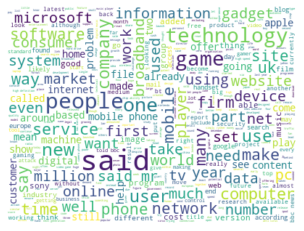

In [17]:
# in this cell we actually create the wordcloud for the TECH category

text = ''.join([' '.join(x) for x in articlesT])
wordcloud = WordCloud(width=400,height=300,max_font_size=40, max_words=1000, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
EvaluationMetric = {
    'Statistic Measure':['Accuracy', 'Precision', 'Recall', 'F-Measure', 'AUC'], 
    'Naive Bayes':[] ,
    'Random Forest':[],
    'SVM':[],
    'KNN':[] }

testSet = {'ID':[], 'Predicted_Category':[]}
testSet_index = 0

mylist = {'Accuracy':[], 'Precision':[], 'Recall':[], 'F-Measure':[], 'AUC':[]}

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final, df_final['category'], test_size=0.2,stratify=df_final['category'] )

#stratify=X['YOUR_COLUMN_LABEL']

In [20]:
# load our data
test_data = X_test
train_data = X_train

# a list of our categories (taken as facts)
categories = ['business','entertainment','politics','sport','tech']

# we will use a number to represent each of our categories
category_dict = {'business':0, 'entertainment':1, 'politics':2, 'sport':3, 'tech':4}

# for our text data, we use a count vectorizer
stopwords = set(STOPWORDS) | set(ENGLISH_STOP_WORDS)
# some additional stopwords based on our own observations
stopwords.add('said')
stopwords.add('say')
stopwords.add('says')
stopwords.add('set')

# our count vectorizer
count_vect = CountVectorizer(stop_words=stopwords)

# we will classify using the 'Title' as a criterion
category_criteria = 'content'


In [21]:
train_data.head()

,id,title,content,category
5209,5209,Toxic web links help virus spread,Virus writers have begun using the power of th...,tech
4129,4129,Weir poised for Sunderland move,Larne's teenage star Robbie Weir is poised to ...,sport
2328,2328,Van Gogh festival film withdrawn,Murdered director Theo van Gogh's controversia...,entertainment
4169,4169,Aragones angered by racism fine,Spain coach Luis Aragones is furious after bei...,sport
4005,4005,Isinbayeva claims new world best,Pole vaulter Yelena Isinbayeva broke her own i...,sport


In [22]:
test_data.head()

,id,title,content,category
4156,4156,Wenger dejected as Arsenal slump,Arsenal manager Arsene Wenger claimed their di...,sport
4093,4093,Lewis-Francis turns to Christie,Mark Lewis-Francis has stepped up his preparat...,sport
1000,1000,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarner...,business
5022,5022,Lasers help bridge network gaps,An Indian telecommunications firm has turned t...,tech
2281,2281,Rap feud in 50 Cent's G-Unit crew,US rap star 50 Cent has said he has thrown pro...,entertainment


In [23]:
# for training
X_train_counts = count_vect.fit_transform(train_data[category_criteria])
tfidf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_counts.shape)
print(X_train_counts.shape)

# for testing
X_test_counts = count_vect.transform(test_data[category_criteria])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_counts.shape)
print(X_test_tfidf.shape)

# we create a 'target' array where we will the category of each of our training data
target = []
for x in train_data['category']:
    target.append(category_dict[x])

target = np.array(target)
print("target[] sample:")
print(target[:40])

C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(1780, 26680)
(1780, 26680)
(445, 26680)
(445, 26680)
target[] sample:
[4 3 1 3 3 3 1 1 2 2 3 1 3 0 0 4 1 4 3 2 4 4 2 4 1 3 0 0 0 3 4 3 0 3 2 2 3
 4 0 3]


# Our 10-fold cross validation function

In [24]:
# 10-FOLD CROSS VALIDATION FOR THE ARGUMENT'S CLASSIFIER
# global variable to keep track of how many times we have called the following function
cross_val_instance = 0

def cross_validate(clf):
    global cross_val_instance    # Needed to modify global copy of a global variable
    
    kf = KFold(n_splits=10)

    fold = 0
    for train_index, test_index in kf.split(train_data[category_criteria]):
        cross_val_instance += 1
        
        X_train_counts = count_vect.transform(train_data[category_criteria].iloc[train_index])
        X_test_counts = count_vect.transform(train_data[category_criteria].iloc[test_index].values.astype('U'))

        clf_cv = clf.fit(X_train_counts, target[train_index])
        yPred = clf_cv.predict(X_test_counts)
        fold += 1
        print ("Fold " + str(fold))
        
        accuracy = accuracy_score(target[test_index], yPred)
        mylist['Accuracy'].append(accuracy)
        print("Accuracy: ", accuracy)
        
        #A = auc(target[test_index], yPred, reorder=True)
        #mylist['AUC'].append(A)
        #print("AUC: ", A)
        
        p = metrics.precision_score(target[test_index], yPred, average='macro')
        mylist['Precision'].append(p)
        print("PRESICION: ", p)
        
        recall = metrics.recall_score(target[test_index], yPred, average='macro') 
        mylist['Recall'].append(recall)
        print("Recall: ", recall)
        f_1 = metrics.f1_score(target[test_index], yPred, average='micro') 
        mylist['F-Measure'].append(f_1)
        print("F-1: ", f_1)
        
        fpr, tpr, thresholds = metrics.roc_curve(target[test_index], yPred, pos_label=2)
        A = metrics.auc(fpr, tpr)
        print("AUC: ",A)
        mylist['AUC'].append(A)
        

        # construct ROC's plot
        plt2.subplot(6, 10, cross_val_instance)
        plt2.plot(fpr, tpr, 'b')
        plt2.plot([0,1], [0, 1],'r--')
        plt2.xlim([0,1])
        plt2.ylim([0, 1])

# Random Forest (RF) Classification

In [25]:
RANDOM_STATE = 123

rndf2 = RandomForestClassifier(warm_start=True, oob_score=True, max_features="sqrt", random_state=RANDOM_STATE)
rndf2.set_params(n_estimators=30)
rndf2.fit(X_train_tfidf, target)

predicted = rndf2.predict(X_test_tfidf)

for x in range(5):
    print(test_data['title'].iloc[x])
    print(categories[predicted[x]])
    print(' ')

Wenger dejected as Arsenal slump
sport
 
Lewis-Francis turns to Christie
sport
 
Ad sales boost Time Warner profit
business
 
Lasers help bridge network gaps
tech
 
Rap feud in 50 Cent's G-Unit crew
entertainment
 


In [26]:
i = 0
for x in predicted :
    testSet['ID'].append(train_data['id'].iloc[i])
    testSet_index+=1
    i+=1
    testSet['Predicted_Category'].append(str(categories[x]))

C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 1
Accuracy:  1.0
PRESICION:  1.0
Recall:  1.0
F-1:  1.0
AUC:  0.48026315789473684


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 2
Accuracy:  0.9887640449438202
PRESICION:  0.9906926406926407
Recall:  0.9872210953346856
F-1:  0.9887640449438202
AUC:  0.47619047619047616


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 3
Accuracy:  0.9887640449438202
PRESICION:  0.9902439024390244
Recall:  0.9876893939393939
F-1:  0.9887640449438202
AUC:  0.5124346917450366


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 4
Accuracy:  1.0
PRESICION:  1.0
Recall:  1.0
F-1:  1.0
AUC:  0.46478873239436624


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 5
Accuracy:  0.9943820224719101
PRESICION:  0.9925925925925926
Recall:  0.9951219512195122
F-1:  0.9943820224719101
AUC:  0.5086345024034182


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 6
Accuracy:  1.0
PRESICION:  1.0
Recall:  1.0
F-1:  1.0
AUC:  0.4130434782608695


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 7
Accuracy:  0.9943820224719101
PRESICION:  0.9949999999999999
Recall:  0.9941176470588236
F-1:  0.9943820224719101
AUC:  0.5100671140939597


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 8
Accuracy:  1.0
PRESICION:  1.0
Recall:  1.0
F-1:  1.0
AUC:  0.5306122448979591


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 9
Accuracy:  1.0
PRESICION:  1.0
Recall:  1.0
F-1:  1.0
AUC:  0.5211267605633803


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 10
Accuracy:  0.9943820224719101
PRESICION:  0.9949999999999999
Recall:  0.9935483870967742
F-1:  0.9943820224719101
AUC:  0.527027027027027


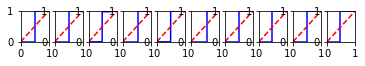

In [27]:
# 10-FOLD CROSS VALIDATION FOR RF CLASSIFICATION
mylist = {'Accuracy':[], 'Precision':[], 'Recall':[], 'F-Measure':[], 'AUC':[]}
cross_validate(rndf2)


Store RF's Evaluation Metrics in our dictionary:

In [28]:
EvaluationMetric['Random Forest']=[]
EvaluationMetric['Random Forest'].append(np.mean(mylist['Precision']))
EvaluationMetric['Random Forest'].append(np.mean(mylist['Recall']))
EvaluationMetric['Random Forest'].append(np.mean(mylist['F-Measure']))
EvaluationMetric['Random Forest'].append(np.mean(mylist['AUC']))
EvaluationMetric['Random Forest'].append(np.mean(mylist['Accuracy']))
EvaluationMetric

{'Statistic Measure': ['Accuracy', 'Precision', 'Recall', 'F-Measure', 'AUC'],
 'Naive Bayes': [],
 'Random Forest': [0.9963529135724256,
  0.995769847464919,
  0.9960674157303371,
  0.494418818547123,
  0.9960674157303371],
 'SVM': [],
 'KNN': []}

# Support Vector Machines Classification

Part I -- with linear kernel and c=0.2
Classifying:


In [29]:
lnr = svm.SVC(C=0.2, kernel='linear')
lnr.fit(X_train_tfidf, target)

predicted = lnr.predict(X_test_tfidf)

print("SVM with linear kernel and c=0.2:")
for x in range(10):
    print(test_data['title'].iloc[x])
    print(categories[predicted[x]])
    print(' ')
print(predicted)

SVM with linear kernel and c=0.2:
Wenger dejected as Arsenal slump
sport
 
Lewis-Francis turns to Christie
sport
 
Ad sales boost Time Warner profit
business
 
Lasers help bridge network gaps
tech
 
Rap feud in 50 Cent's G-Unit crew
entertainment
 
Mobile music challenges 'iPod age'
tech
 
Tories urge 'change at the top'
politics
 
Gold falls on IMF sale concerns
business
 
Nasdaq planning $100m share sale
business
 
German business confidence slides
business
 
[3 3 0 4 1 4 2 0 0 0 4 1 3 3 4 3 3 3 3 0 3 1 1 1 2 3 0 0 2 0 0 3 4 0 3 0 4
 2 4 4 4 0 4 0 4 0 2 1 4 1 3 3 2 3 1 2 3 0 1 1 1 3 2 0 1 4 0 2 0 1 3 0 2 3
 2 4 0 3 2 0 3 1 2 3 4 1 0 3 2 3 0 1 3 4 3 3 0 0 4 2 1 3 0 3 0 2 3 0 1 3 1
 3 2 2 3 2 0 4 2 0 0 3 2 0 3 2 0 1 1 4 4 4 1 2 1 2 0 0 1 2 4 3 3 0 3 1 3 2
 0 1 4 4 4 2 0 0 1 0 3 2 3 2 3 2 4 3 1 3 1 1 1 0 4 2 4 4 1 2 1 4 3 2 4 2 0
 0 0 2 3 1 2 1 0 0 1 4 2 3 2 2 4 2 0 3 3 3 0 3 4 3 0 0 3 0 3 3 0 4 2 4 3 2
 4 3 3 2 2 0 3 3 4 4 3 1 3 1 4 2 2 3 3 0 4 2 4 4 2 0 3 4 1 2 0 2 3 4 1 2 0
 3 0 4 1 

In [30]:
i = 0
for x in predicted :
    testSet['ID'].append(train_data['id'].iloc[i])
    testSet_index+=1
    i+=1
    testSet['Predicted_Category'].append(str(categories[x]))
print(len(testSet['ID']),len(testSet['Predicted_Category']))

890 890


# Cross Validating:

Fold 1
Accuracy:  0.9662921348314607
PRESICION:  0.9679420289855072
Recall:  0.9628891230104578
F-1:  0.9662921348314607
AUC:  0.4635627530364373
Fold 2
Accuracy:  0.9831460674157303
PRESICION:  0.9838095238095239
Recall:  0.9827879853751099
F-1:  0.9831460674157303
AUC:  0.4719113451832345
Fold 3
Accuracy:  0.9550561797752809
PRESICION:  0.9586104951958611
Recall:  0.9527632090132091
F-1:  0.9550561797752809
AUC:  0.5072100313479624
Fold 4
Accuracy:  0.9775280898876404
PRESICION:  0.9767965367965369
Recall:  0.9774509803921569
F-1:  0.9775280898876404
AUC:  0.4620500782472614
Fold 5
Accuracy:  0.9662921348314607
PRESICION:  0.9661644263175744
Recall:  0.9673598898998395
F-1:  0.9662921348314607
AUC:  0.5240341819476588
Fold 6
Accuracy:  0.9550561797752809
PRESICION:  0.952181468120747
Recall:  0.9513560334528076
F-1:  0.9550561797752809
AUC:  0.39501811594202896
Fold 7
Accuracy:  0.9550561797752809
PRESICION:  0.9530140574524226
Recall:  0.9590479478658669
F-1:  0.9550561797752809
AUC

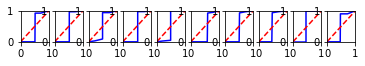

In [31]:
# 10-FOLD CROSS VALIDATION FOR SVM CLASSIFICATION (I)
# with linear kernel and c=0.2
mylist = {'Accuracy':[], 'Precision':[], 'Recall':[], 'F-Measure':[], 'AUC':[]}
cross_validate(lnr)

Store SVM's Evaluation Metrics in our dictionary:

In [32]:
EvaluationMetric['SVM']=[]
EvaluationMetric['SVM'].append(np.mean(mylist['Accuracy']))
EvaluationMetric['SVM'].append(np.mean(mylist['Precision']))
EvaluationMetric['SVM'].append(np.mean(mylist['Recall']))
EvaluationMetric['SVM'].append(np.mean(mylist['F-Measure']))
EvaluationMetric['SVM'].append(np.mean(mylist['AUC']))
EvaluationMetric

{'Statistic Measure': ['Accuracy', 'Precision', 'Recall', 'F-Measure', 'AUC'],
 'Naive Bayes': [],
 'Random Forest': [0.9963529135724256,
  0.995769847464919,
  0.9960674157303371,
  0.494418818547123,
  0.9960674157303371],
 'SVM': [0.9679775280898877,
  0.9684684574940986,
  0.9675720468783451,
  0.9679775280898877,
  0.4838982621669305],
 'KNN': []}

# Part II -- with rbf kernel, c=5000000.0 and gamma=100000
Classifying:

In [33]:
rbf = svm.SVC(C=5000000.0, kernel='rbf', gamma=100000)
rbf.fit(X_train_tfidf, target)

predicted = rbf.predict(X_test_tfidf)

print("SVM with rbf kernel, c=5000000.0 and gamma=100000:")
for x in range(10):
    print(test_data['title'].iloc[x])
    print(categories[predicted[x]])
    print(' ')

SVM with rbf kernel, c=5000000.0 and gamma=100000:
Wenger dejected as Arsenal slump
business
 
Lewis-Francis turns to Christie
business
 
Ad sales boost Time Warner profit
business
 
Lasers help bridge network gaps
business
 
Rap feud in 50 Cent's G-Unit crew
business
 
Mobile music challenges 'iPod age'
business
 
Tories urge 'change at the top'
business
 
Gold falls on IMF sale concerns
business
 
Nasdaq planning $100m share sale
business
 
German business confidence slides
business
 


In [34]:
i = 0
for x in predicted :
    testSet['ID'].append(train_data['id'].iloc[i])
    testSet_index+=1
    i+=1
    testSet['Predicted_Category'].append(str(categories[x]))
print(len(testSet['ID']),len(testSet['Predicted_Category']))


1335 1335


# Cross Validating:

Fold 1
Accuracy:  0.3258426966292135
PRESICION:  0.852760736196319
Recall:  0.29419681767507855
F-1:  0.3258426966292135
AUC:  0.5159412955465587
Fold 2
Accuracy:  0.29213483146067415
PRESICION:  0.6491017964071857
Recall:  0.2615815718635541
F-1:  0.29213483146067415
AUC:  0.48101821373710774


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 3
Accuracy:  0.2752808988764045
PRESICION:  0.6464285714285715
Recall:  0.2602272727272727
F-1:  0.2752808988764045
AUC:  0.48380355276906994


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 4
Accuracy:  0.2752808988764045
PRESICION:  0.8417177914110429
Recall:  0.28180555555555553
F-1:  0.2752808988764045
AUC:  0.4798513302034429
Fold 5
Accuracy:  0.3089887640449438
PRESICION:  0.652694610778443
Recall:  0.26615466336151566
F-1:  0.3089887640449438
AUC:  0.5207406088659426


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 6
Accuracy:  0.25842696629213485
PRESICION:  0.837037037037037
Recall:  0.2914719235364397
F-1:  0.25842696629213485
AUC:  0.4721014492753623
Fold 7
Accuracy:  0.34269662921348315
PRESICION:  0.8573170731707318
Recall:  0.28313309408644094
F-1:  0.34269662921348315
AUC:  0.4725757926405925
Fold 8
Accuracy:  0.30337078651685395
PRESICION:  0.8496969696969696
Recall:  0.2843548387096774
F-1:  0.30337078651685395
AUC:  0.44129910028527536
Fold 9
Accuracy:  0.34269662921348315
PRESICION:  0.6528301886792452
Recall:  0.3130050505050505
F-1:  0.34269662921348315
AUC:  0.5152582159624413


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 10
Accuracy:  0.3202247191011236
PRESICION:  0.6496894409937888
Recall:  0.2981716076792477
F-1:  0.3202247191011236
AUC:  0.44256756756756754


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


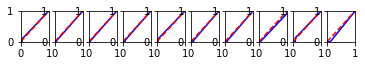

In [35]:
# 10-FOLD CROSS VALIDATION FOR SVM CLASSIFICATION (II)
# with rbf kernel, c=5000000.0 and gamma=100000
mylist = {'Accuracy':[], 'Precision':[], 'Recall':[], 'F-Measure':[], 'AUC':[]}
cross_validate(rbf)

# Naive Bayes Classification
Part I -- with Multinomial Naive Bayes
Classifying:

In [36]:
mnb = MultinomialNB().fit(X_train_tfidf, target)

predicted = mnb.predict(X_test_tfidf)

print("Multinomial NB:")
for x in range(10):
    print(test_data['title'].iloc[x])
    print(categories[predicted[x]])
    print(' ')

Multinomial NB:
Wenger dejected as Arsenal slump
sport
 
Lewis-Francis turns to Christie
sport
 
Ad sales boost Time Warner profit
business
 
Lasers help bridge network gaps
tech
 
Rap feud in 50 Cent's G-Unit crew
entertainment
 
Mobile music challenges 'iPod age'
tech
 
Tories urge 'change at the top'
politics
 
Gold falls on IMF sale concerns
business
 
Nasdaq planning $100m share sale
business
 
German business confidence slides
business
 


In [37]:
i = 0
for x in predicted :
    testSet['ID'].append(train_data['id'].iloc[i])
    testSet_index+=1
    i+=1
    testSet['Predicted_Category'].append(str(categories[x]))
print(len(testSet['ID']),len(testSet['Predicted_Category']))

1780 1780


# Cross Validating:

Fold 1
Accuracy:  0.9775280898876404
PRESICION:  0.9758828596037897
Recall:  0.9763387000596303
F-1:  0.9775280898876404
AUC:  0.4607793522267206
Fold 2
Accuracy:  0.9887640449438202
PRESICION:  0.9888888888888889
Recall:  0.9882253994953742
F-1:  0.9887640449438202
AUC:  0.4625850340136054
Fold 3
Accuracy:  0.9662921348314607
PRESICION:  0.9650216450216451
Recall:  0.9665112665112666
F-1:  0.9662921348314607
AUC:  0.5044932079414838
Fold 4
Accuracy:  0.9719101123595506
PRESICION:  0.9741176470588236
Recall:  0.9691176470588235
F-1:  0.9719101123595506
AUC:  0.43661971830985913
Fold 5
Accuracy:  0.9943820224719101
PRESICION:  0.9933333333333334
Recall:  0.9951219512195122
F-1:  0.9943820224719101
AUC:  0.5202955314224675
Fold 6
Accuracy:  0.9550561797752809
PRESICION:  0.9554497354497353
Recall:  0.9461111111111112
F-1:  0.9550561797752809
AUC:  0.3662137681159421
Fold 7
Accuracy:  0.9606741573033708
PRESICION:  0.9567398119122258
Recall:  0.9618175460262552
F-1:  0.9606741573033708
AU

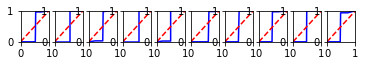

In [38]:
# 10-FOLD CROSS VALIDATION FOR NB CLASSIFICATION (I)
# with Multinomial Naive Bayes
mylist = {'Accuracy':[], 'Precision':[], 'Recall':[], 'F-Measure':[], 'AUC':[]}
cross_validate(mnb)

Store NB's Evaluation Metrics in our dictionary:

In [39]:
EvaluationMetric['Naive Bayes']=[]
EvaluationMetric['Naive Bayes'].append(np.mean(mylist['Accuracy']))
EvaluationMetric['Naive Bayes'].append(np.mean(mylist['Precision']))
EvaluationMetric['Naive Bayes'].append(np.mean(mylist['Recall']))
EvaluationMetric['Naive Bayes'].append(np.mean(mylist['F-Measure']))
EvaluationMetric['Naive Bayes'].append(np.mean(mylist['AUC']))
EvaluationMetric

{'Statistic Measure': ['Accuracy', 'Precision', 'Recall', 'F-Measure', 'AUC'],
 'Naive Bayes': [0.9735955056179776,
  0.9733262916519851,
  0.9727024289221345,
  0.9735955056179776,
  0.47982128831670146],
 'Random Forest': [0.9963529135724256,
  0.995769847464919,
  0.9960674157303371,
  0.494418818547123,
  0.9960674157303371],
 'SVM': [0.9679775280898877,
  0.9684684574940986,
  0.9675720468783451,
  0.9679775280898877,
  0.4838982621669305],
 'KNN': []}

# K-Nearest Neighbor Classification
Our assistant-funtions for the K-Nearest Neighbor Classification

In [40]:
svd = TruncatedSVD(n_iter=5, random_state=None)
train_array = svd.fit_transform(X_train_tfidf)
test_array = svd.fit_transform(X_test_tfidf)

In [41]:
# given two data points, calculate the euclidean distance between them
def get_distance(data1, data2):
    points = zip(data1, data2)
    diffs_squared_distance = [pow(a - b, 2) for (a, b) in points]
    return math.sqrt(sum(diffs_squared_distance))

# a function that returns sorted distances between a test case and all training cases
def get_neighbours(training_set, test_instance, k):
    distances = [_get_tuple_distance(training_instance, test_instance) for training_instance in training_set]
    # index 1 is the calculated distance between training_instance and test_instance
    sorted_distances = sorted(distances, key=itemgetter(1))
    # extract only training instances
    sorted_training_instances = [tuple[0] for tuple in sorted_distances]
    # select first k elements
    return sorted_training_instances[:k]
 
def _get_tuple_distance(training_instance, test_instance):
    return (training_instance, get_distance(test_instance, training_instance))

# given an array of nearest neighbours for a test case, tally up their classes to vote on test case class
def get_majority_vote(neighbours):
    # index 1 is the class
    classes = [neighbour[1] for neighbour in neighbours]
    count = Counter(classes)
    return count.most_common()[0][0]

Our K-Nearest Neighbor Classification function

In [42]:
# generate predictions
def KNN(train_array,test_array): #synarthsh pou epistrefeei thn lista me ta predictions
    predictions = []
    # let's arbitrarily set k equal to 3
    k = 3

    # for each instance in the test set, get nearest neighbours and majority vote on predicted class
    for x in range(len(test_array)):#mono ta prwta 5
        #print('Classifying test instance number ' + str(x) + ":")
        neighbours = get_neighbours(training_set=train_array, test_instance=test_array[x], k=2)
        majority_vote = get_majority_vote(neighbours)
        predictions.append(majority_vote)
        #print ('Predicted label=' + str(majority_vote) + ', Actual label=' + str(test_array[x][1]))
    for y in range(len(predictions)):
        predictions[y] = math.ceil(predictions[y])
    #print(predictions)
    return predictions

In [43]:
print(cross_val_instance)

40


Our K-Nearest Neighbor Cross Validation function

Fold 1
Accuracy:  0.03333333333333333
PRESICION:  0.006410256410256411
Recall:  0.016666666666666666
F-1:  0.03333333333333333
AUC:  1.0


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 2
Accuracy:  0.26666666666666666
PRESICION:  0.07407407407407408
Recall:  0.09365079365079364
F-1:  0.26666666666666666
AUC:  0.5172413793103448


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 3
Accuracy:  0.1
PRESICION:  0.04285714285714286
Recall:  0.05
F-1:  0.10000000000000002
AUC:  0.2345679012345679


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 4
Accuracy:  0.2
PRESICION:  0.12708333333333333
Recall:  0.1517361111111111
F-1:  0.20000000000000004
AUC:  0.544973544973545


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 5
Accuracy:  0.13333333333333333
PRESICION:  0.05714285714285715
Recall:  0.028571428571428574
F-1:  0.13333333333333333
AUC:  0.9689440993788819


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 6
Accuracy:  0.03333333333333333
PRESICION:  0.047619047619047616
Recall:  0.02040816326530612
F-1:  0.03333333333333333
AUC:  0.9903846153846153


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 7
Accuracy:  0.13333333333333333
PRESICION:  0.0839002267573696
Recall:  0.11326530612244899
F-1:  0.13333333333333333
AUC:  0.6634615384615385


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 8
Accuracy:  0.23333333333333334
PRESICION:  0.058333333333333334
Recall:  0.05384615384615384
F-1:  0.23333333333333334
AUC:  0.972


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 9
Accuracy:  0.2
PRESICION:  0.18409090909090908
Recall:  0.11515151515151514
F-1:  0.20000000000000004
AUC:  0.003105590062111799


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 10
Accuracy:  0.06666666666666667
PRESICION:  0.025974025974025972
Recall:  0.025974025974025972
F-1:  0.06666666666666667
AUC:  0.4627329192546583


C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


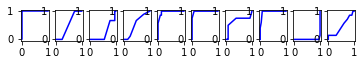

In [44]:
# 10-FOLD CROSS VALIDATION FOR THE ARGUMENT'S CLASSIFIER
# global variable to keep track of how many times we have called the following function
mylist = {'Accuracy':[], 'Precision':[], 'Recall':[], 'F-Measure':[], 'AUC':[]}
global cross_val_instance    # Needed to modify global copy of a global variable
    
kf = KFold(n_splits=10)

fold = 0
for train_index, test_index in kf.split(train_data[category_criteria]):
    cross_val_instance += 1

    X_train_counts = count_vect.transform(train_data[category_criteria].iloc[train_index])
    X_test_counts = count_vect.transform(train_data[category_criteria].iloc[test_index].values.astype('U'))

    #clf_cv = clf.fit(X_train_counts, target[train_index])
    #yPred = clf_cv.predict(X_test_counts)
    X_train_counts = svd.fit_transform(X_train_counts)
    X_test_counts = svd.fit_transform(X_test_counts)
    X_test_counts = X_test_counts[0:30]    # we take only the first 5
    test_index = test_index[0:30]
    yPred = KNN( X_train_counts ,  X_test_counts )
    fold += 1
    print ("Fold " + str(fold))

    accuracy = accuracy_score(target[test_index], yPred)
    mylist['Accuracy'].append(accuracy)
    print("Accuracy: ", accuracy)

#     A = auc(target[test_index], yPred, reorder=True)
#     mylist['AUC'].append(A)
#     print("AUC: ", A)

    p = metrics.precision_score(target[test_index], yPred, average='macro')
    mylist['Precision'].append(p)
    print("PRESICION: ", p)

    recall = metrics.recall_score(target[test_index], yPred, average='macro') 
    mylist['Recall'].append(recall)
    print("Recall: ", recall)
    f_1 = metrics.f1_score(target[test_index], yPred, average='micro') 
    mylist['F-Measure'].append(f_1)
    print("F-1: ", f_1)

    fpr, tpr, thresholds = metrics.roc_curve(target[test_index], yPred, pos_label=2)
    A = metrics.auc(fpr, tpr)
    print("AUC: ", A)
    mylist['AUC'].append(A)
        
    # construct ROC's plot
    plt2.subplot(6, 10, cross_val_instance)
    plt2.plot(fpr, tpr, 'b')

Store KNN's Evaluation Metrics in our dictionary:

In [45]:
EvaluationMetric['KNN'] =[]
EvaluationMetric['KNN'].append(np.mean(mylist['Accuracy']))
EvaluationMetric['KNN'].append(np.mean(mylist['Precision']))
EvaluationMetric['KNN'].append(np.mean(mylist['Recall']))
EvaluationMetric['KNN'].append(np.mean(mylist['F-Measure']))
EvaluationMetric['KNN'].append(np.mean(mylist['AUC']))
EvaluationMetric

{'Statistic Measure': ['Accuracy', 'Precision', 'Recall', 'F-Measure', 'AUC'],
 'Naive Bayes': [0.9735955056179776,
  0.9733262916519851,
  0.9727024289221345,
  0.9735955056179776,
  0.47982128831670146],
 'Random Forest': [0.9963529135724256,
  0.995769847464919,
  0.9960674157303371,
  0.494418818547123,
  0.9960674157303371],
 'SVM': [0.9679775280898877,
  0.9684684574940986,
  0.9675720468783451,
  0.9679775280898877,
  0.4838982621669305],
 'KNN': [0.13999999999999999,
  0.07074852065923495,
  0.06692701643594501,
  0.13999999999999999,
  0.6357411588060262]}

# Presenting our Results

We present our 10-fold Cross Validation's Evaluation Metrics:

In [46]:
# creating the dataframe
EvaluationMetric_10fold = pd.DataFrame(data=EvaluationMetric)
EvaluationMetric_10fold

,Statistic Measure,Naive Bayes,Random Forest,SVM,KNN
0,Accuracy,0.973596,0.996353,0.967978,0.140000
1,Precision,0.973326,0.995770,0.968468,0.070749
2,Recall,0.972702,0.996067,0.967572,0.066927
3,F-Measure,0.973596,0.494419,0.967978,0.140000
4,AUC,0.479821,0.996067,0.483898,0.635741


In [47]:
print(len(testSet['ID']),len(testSet['Predicted_Category']))

1780 1780


In [48]:
# printing our test set's data frame
testSetpd = pd.DataFrame(data=testSet)
testSetpd

,ID,Predicted_Category
0,5209,sport
1,4129,sport
2,2328,business
3,4169,tech
4,4005,entertainment
...,...,...
1775,3351,sport
1776,1217,politics
1777,5094,sport
1778,4199,sport


# Part 4

## Setting up

We pass our training data:

In [49]:
mydata = X_train
mydata.head()

,id,title,content,category
5209,5209,Toxic web links help virus spread,Virus writers have begun using the power of th...,tech
4129,4129,Weir poised for Sunderland move,Larne's teenage star Robbie Weir is poised to ...,sport
2328,2328,Van Gogh festival film withdrawn,Murdered director Theo van Gogh's controversia...,entertainment
4169,4169,Aragones angered by racism fine,Spain coach Luis Aragones is furious after bei...,sport
4005,4005,Isinbayeva claims new world best,Pole vaulter Yelena Isinbayeva broke her own i...,sport


We declare the stopwords that we are going to use:

In [50]:
# declaring our stopwords
stopwords = set(STOPWORDS) | set(ENGLISH_STOP_WORDS)
# some additional stopwords based on our own observations
stopwords.add('said')
stopwords.add('say')
stopwords.add('says')
stopwords.add('set')

We declare our vectorizer, which is a TfidfVectorizer (term-frequency times inverse document-frequency vectorizer), and we pass our data through him:

In [51]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(mydata['content'])
svd = TruncatedSVD(n_components=100)
X_lsi = svd.fit_transform(X)
vectors = X_lsi

C:\Users\dimitris\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# K-Means Clustering

We implement K-Means using Cosine Similarity as a distance function:

In [52]:
# A IMPLEMENTATION OF CLUSTERING WITH KMEANS USING COSINE SIMILARITY, UTILIZING COMPONENTS OF THE NLTK LIBRARY
clusterer = cluster.KMeansClusterer(5, cosine_distance, repeats=1)

In [53]:
clusters_array = clusterer.cluster(vectors, True, trace=True) # we take a list of our clusters

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


# Printing Clustering Results

We will now work towards printing our Clustering's results in a nice way...

In [54]:
our_dict = {'0':[], '1':[], '2':[], '3':[], '4':[]}

counter = 0

# we create a dictionary that for each cluster has the numbers of the texts that belong to it
for x in clusters_array :
    our_dict[str(x)] += [counter]
    counter +=1

In [55]:
cnt = Counter()
# our categories
categories =['business', 'entertainment', 'politics', 'sport', 'tech']

# we create a counter-dictionary based on the above categories
for x in categories :
        cnt[x] =[]

cnt[''] =[]
print(cnt)

Counter({'business': [], 'entertainment': [], 'politics': [], 'sport': [], 'tech': [], '': []})


In [56]:
data_categories = mydata['category']

In [57]:
type(data_categories)

pandas.core.series.Series

In [58]:
# we will have 5 clusters
clusters=['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4']
# we have 5 categories
categoryl = ['business', 'entertainment', 'politics', 'sport', 'tech']

In [59]:
outdict = {'':clusters, 'business':[],  'entertainment':[], 'politics':[], 'sport':[], 'tech':[]}

for cluster_num in range(len(our_dict)): # for each cluster
    count = {}
    cluster_length = len(our_dict[str(cluster_num)])
    
    for x in our_dict[str(cluster_num)]:
        category = data_categories.iloc[x]  # this way we take the category
        if category in count:
            count[str(category)] += 1/cluster_length
        else:
            count[str(category)] = 1/cluster_length
    
    for category in categoryl: # we create our dictionary
        if str(category) in count:
            outdict[str(category)] += [count[str(category)]]
        else:
            outdict[str(category)] += [0]

print(outdict)

{'': ['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4'], 'business': [0.006734006734006734, 0.949044585987261, 0.0025, 0.03554868624420401, 0.688524590163935], 'entertainment': [0.9595959595959568, 0.009554140127388536, 0, 0.01854714064914992, 0.07377049180327869], 'politics': [0, 0.01592356687898089, 0, 0.5038639876352425, 0.01639344262295082], 'sport': [0.006734006734006734, 0.0031847133757961785, 0.9624999999999905, 0, 0.17213114754098363], 'tech': [0.02693602693602693, 0.022292993630573247, 0.034999999999999996, 0.4420401854714087, 0.049180327868852465]}


We create a dataframe with the above data

In [60]:
# creating the dataframe
out_pd = pd.DataFrame(data=outdict)
out_pd

,,business,entertainment,politics,sport,tech
0,Cluster_0,0.006734,0.959596,0.000000,0.006734,0.026936
1,Cluster_1,0.949045,0.009554,0.015924,0.003185,0.022293
2,Cluster_2,0.002500,0.000000,0.000000,0.962500,0.035000
3,Cluster_3,0.035549,0.018547,0.503864,0.000000,0.442040
4,Cluster_4,0.688525,0.073770,0.016393,0.172131,0.049180


Given the above visualization of clustering, we can understand from which category are the majority of items in each cluster

So we are going to check if our clustering aligns with the category of our articles. We are going to take a sample of 100 articles of the train set.

In [61]:
temp=0
for index, row in mydata.head(100).iterrows():
   print("Item of category: ", mydata.loc[index,"category"], " belongs to cluster ", clusters_array[temp])
   temp = temp + 1
    

Item of category:  tech  belongs to cluster  3
Item of category:  sport  belongs to cluster  2
Item of category:  entertainment  belongs to cluster  0
Item of category:  sport  belongs to cluster  2
Item of category:  sport  belongs to cluster  2
Item of category:  sport  belongs to cluster  2
Item of category:  entertainment  belongs to cluster  0
Item of category:  entertainment  belongs to cluster  0
Item of category:  politics  belongs to cluster  3
Item of category:  politics  belongs to cluster  3
Item of category:  sport  belongs to cluster  2
Item of category:  entertainment  belongs to cluster  0
Item of category:  sport  belongs to cluster  2
Item of category:  business  belongs to cluster  1
Item of category:  business  belongs to cluster  1
Item of category:  tech  belongs to cluster  3
Item of category:  entertainment  belongs to cluster  0
Item of category:  tech  belongs to cluster  3
Item of category:  sport  belongs to cluster  2
Item of category:  politics  belongs to